In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import nbinom
import scipy
%matplotlib inline

# Data

The data is fetched directly from Sciensao's spreadsheet, and consolidated with @vdwnico's original values for the beginning of the time-series.

In [74]:
def consolidate(v1, v2):
    v1 = {k:v for k, v in v1}
    v2 = {k:v for k, v in v2}
    v2.update(v1)
    return [(k, v) for k, v in v2.items()]

In [75]:
# Hospitalizations
nico_hosps = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7,
    0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14,
    27), (15, 97), (16, 163), (17, 265), (18, 368), (19, 496), (20,
    649), (21, 842), (22, 1097), (23, 1381), (24, 1644), (25,
    1881), (26, 2138), (27, 2718), (28, 3072), (29, 3644), (30,
    4081), (31, 4474), (32, 4886), (33, 4979), (34, 5210), (35,
    5362), (36, 5497), (37, 5514), (38, 5606), (39, 5744), (40,
    5699), (41, 5597), (42, 5618), (43, 5645), (44, 5419), (45,
    5423), (46, 5536), (47, 5515), (48, 5309), (49, 5161), (50,
    5069), (51, 4871), (52, 4920), (53, 4976), (54, 4765), (55, 
    4527)] # last == April 22
    
df = pd.read_excel("https://epistat.sciensano.be/Data/COVID19BE.xlsx", sheet_name="HOSP")
sciensano_hosps = df.groupby("DATE")["TOTAL_IN"].sum()   # start on March 15
sciensano_hosps = [(i+17, v) for i, v in enumerate(sciensano_hosps)]
hosps = consolidate(sciensano_hosps, nico_hosps)

In [76]:
# ICUs
nico_icus = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7,
    0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 2), (14,
    15), (15, 24), (16, 33), (17, 53), (18, 79), (19, 100), (20,
    130), (21, 164), (22, 238), (23, 290), (24, 322), (25, 381), (26,
    474), (27, 605), (28, 690), (29, 789), (30, 867), (31, 927), (32,
    1021), (33, 1088), (34, 1144), (35, 1205), (36, 1245), (37,
    1261), (38, 1267), (39, 1260), (40, 1276), (41, 1285), (42,
    1278), (43, 1262), (44, 1232), (45, 1234), (46, 1226), (47,
    1204), (48, 1182), (49, 1140), (50, 1119), (51, 1081), (52,
    1071), (53, 1079), (54, 1020), (55, 993)]  # last == April 22
  
df = pd.read_excel("https://epistat.sciensano.be/Data/COVID19BE.xlsx", sheet_name="HOSP")
sciensano_icus = df.groupby("DATE")["TOTAL_IN_ICU"].sum()   # start on March 15
sciensano_icus = [(i+17, v) for i, v in enumerate(sciensano_icus)]
icus = consolidate(sciensano_icus, nico_icus)

In [77]:
# Daily deaths
nico_deaths = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7,
    0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 1), (14,
    3), (15, 3), (16, 5), (17, 5), (18, 10), (19, 10), (20, 19), (21,
    25), (22, 27), (23, 36), (24, 46), (25, 75), (26, 69), (27,
    91), (28, 91), (29, 115), (30, 128), (31, 133), (32, 158), (33,
    172), (34, 238), (35, 193), (36, 224), (37, 269), (38, 225), (39,
    267), (40, 299), (41, 321), (42, 275), (43, 323), (44, 283), (45,
    338), (46, 270), (47, 262), (48, 266), (49, 240), (50, 191), (51,
    98), (52, 22), (53, 170), (54, 266), (55, 230)]  # last == April 22

df = pd.read_excel("https://epistat.sciensano.be/Data/COVID19BE.xlsx", sheet_name="MORT")
sciensano_deaths = df.groupby("DATE")["DEATHS"].sum()   # start on March 10
sciensano_deaths = [(i+12, v) for i, v in enumerate(sciensano_deaths)]
deaths = consolidate(sciensano_deaths, nico_deaths)

In [78]:
deaths[-5:]

[(51, 198), (52, 215), (53, 187), (54, 110), (55, 12)]

In [112]:
# Convert to pandas 
data = pd.DataFrame({
    "n_hospitalized": [i for _ , i in hosps],
    "n_icu": [i for _, i in icus],
    "n_daily_deaths": [i for _, i in deaths]
}, index=range(1, len(hosps)+1))

data["n_deaths"] = data["n_daily_deaths"].cumsum()

In [80]:
data.head(20)

,n_hospitalized,n_icu,n_daily_deaths,n_deaths
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0
10,0,0,0,0


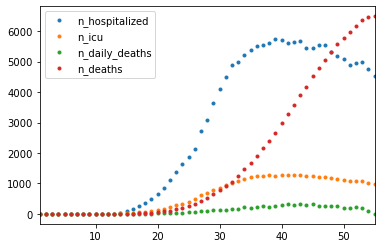

In [81]:
data.plot(style=".")

In [82]:
data.describe()

,n_hospitalized,n_icu,n_daily_deaths,n_deaths
count,55.000000,55.000000,55.000000,55.000000
mean,2841.890909,625.000000,118.000000,1810.781818
std,2416.922612,537.134165,116.998259,2261.310344
min,0.000000,0.000000,0.000000,0.000000
25%,62.000000,19.500000,3.000000,6.500000
50%,3077.000000,690.000000,92.000000,522.000000
75%,5275.500000,1163.000000,227.000000,3430.500000
max,5759.000000,1285.000000,339.000000,6490.000000


# SEIR model

Python re-implementation of Nicolas' original SEIR model.

In [83]:
# Parameters
frac_dh = 2985 / 6490  # deaths in hospitals / total deaths
window = 6          # size of the window for fitting Re's
hh = 0.05           # fraction of hospitalized 
gamma = 1 / 12.4    # inverse recovery time
epsilon = 1 / 5.2   # inverse incubation time 
dea = 0.5           # fatality rate in icu 
n0 = 11000000       # population size
n0_MRS = 400000     # Population en MR/MRS + personnel soignant

In [84]:
def SEIR(r0, i0=3, gg=0.75):
    n_days = len(r0)
    
    drea = dea * 1 / 5
    rrea = (1 - dea) * 1 / 20
    n = [n0]
    i = [i0]
    e = [i[-1] * 37]
    h = [0.0]
    l = [0.0]
    r = [0.0]
    m = [0.0]
    s = [n[-1] - e[-1] - i[-1] - r[-1]]
    hospi = 0.0
    
    for day in range(n_days):
        lam = gamma * r0[day]
        
        if day == 14:
            hospi = hh / 7
            
        ds = -lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1]
        de = lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1] - epsilon * e[-1]
        di = epsilon * e[-1] - gamma * i[-1] - hospi * i[-1]
        dh = hospi * i[-1] - gg * h[-1] / 7 - (1 - gg) * h[-1] / (4 + 2 * np.tanh((l[-1]-500)/300))
        dl = (1 - gg) * h[-1] / (4 + 2 * np.tanh((l[-1]-500)/300)) - drea * l[-1] - rrea * l[-1]
        dr = gamma * i[-1] + rrea * l[-1] + gg * h[-1] / 7
        dm = drea * l[-1] 
        
        s.append(s[-1] + ds)
        e.append(e[-1] + de)
        i.append(i[-1] + di)
        h.append(h[-1] + dh)
        l.append(l[-1] + dl)
        if l[-1] > 1895:
            dm = dm + (l[-1] - 1895)
            l[-1] = 1895
        r.append(r[-1] + dr)
        m.append(m[-1] + dm)
        n.append(s[-1] + e[-1] + i[-1] + h[-1] + l[-1] + r[-1])
        
    return np.array(s), np.array(e), np.array(i), np.array(h), np.array(l), np.array(m), np.array(r)

def SEIR_MRS(r0_mrs):
    n_days = len(r0_mrs)
    
    alpha = 0.15 / 10
    lam = gamma * 4.3
    n = [n0_MRS]
    i = [1]
    e = [i[-1]*20]
    r = [0.0]
    s = [n[-1] - e[-1] - i[-1] - r[-1]]
    m = [0.0]
    
    for day in range(n_days):
        lam = gamma * r0_mrs[day]
        
        ds = -lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1]
        de = lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1] - epsilon * e[-1]
        di = epsilon * e[-1] - (gamma + alpha) * i[-1]
        dr = gamma * i[-1]
        dm = alpha * i[-1]
        
        s.append(s[-1] + ds)
        e.append(e[-1] + de)
        i.append(i[-1] + di)
        r.append(r[-1] + dr)
        m.append(m[-1] + dm)
        n.append(s[-1] + e[-1] + i[-1] + r[-1])
        
    return np.array(s), np.array(e), np.array(i), np.array(m), np.array(r)

# Parameter fit

The procedure is different from Nicolas'. All parameters are fit jointly, instead of using a greedy procedure to fit parameters sequentially. Results are therefore slightly different.

In [85]:
from scipy.optimize import minimize

In [86]:
def pack(r0, r0_rms, i0, gg, sigmas):
    v = np.zeros(len(r0) + len(r0_rms) + 2 + 4)
    v[:len(r0)] = r0
    v[len(r0):len(r0)+len(r0_rms)] = r0_rms
    v[len(r0)+len(r0_rms):len(r0)+len(r0_rms)+4] = sigmas
    v[-2] = i0
    v[-1] = gg
    return v 

def unpack(v):
    return v[:(len(v)-2-4)//2], v[(len(v)-2-4)//2:len(v)-2-4], v[-2], v[-1], v[-6:-2]

def smoothen(v, n_pts=5):
    box = np.ones(n_pts) / n_pts
    return np.convolve(v, box, mode="same")

## Choice of noise model

In [87]:
from scipy.special import factorial
import scipy.special as sc


In [88]:
np.random.randn(100)

array([ 0.36915335,  0.01454321,  0.87189272, -0.03795613,  0.91413477,
       -1.67900766, -1.82311288,  1.30577903, -0.73091683, -1.46894769,
       -1.11627612,  0.32895276,  0.05454911, -0.07537885, -1.05781709,
        0.64279087, -0.45469344,  0.31755821,  0.33224667,  0.27432002,
       -0.61297551, -2.09156468,  0.81919366, -0.13043148,  0.08177068,
       -0.67090894,  1.33832235, -0.37215126, -0.04936084,  0.12568925,
        1.70656505,  1.51377816,  0.13690335, -0.2277196 ,  0.72802198,
        0.65785409,  0.72430975,  0.36705762, -0.58440638,  0.20635091,
       -0.00435896, -0.5725839 ,  1.33523686,  0.26541221, -0.38345419,
       -0.09032226, -0.91714926,  0.33742106, -1.2291568 ,  0.88863982,
       -0.51053875,  0.59859553, -1.35421182,  0.53263092,  0.47305727,
       -0.86513539, -1.12018085, -0.87964881, -0.61779901,  0.81641746,
       -0.97324401,  0.42117984,  0.49676874, -1.07255865, -0.80412432,
        0.02163113, -1.3348704 ,  1.06543844,  0.61085024, -1.17

In [89]:
def gaussian_noise_sample(mu, sigma):
    return np.random.randn(len(mu)) * sigma + mu

def gaussian_error(x, mu, sigma):
    return ((x - mu)/sigma)**2

def poisson_noise_sample(mu, sigma):
    return np.random.poisson(mu)

def poisson_error(x, mu, sigma):
    #print(sc.gammaln(x.astype(int)))
    # Not possible to directly use the probability mass function because of zero and factorial that explodes for 
    #large numbers.
    return -(x*np.log(mu.astype(float) + 1e-10)-mu-sc.gammaln(x.astype(float) +  + 1e-10))

# Warning! We should learn an overdispersion parameter
def neg_binom_sample(mu, sigma):
    sigma = (mu + 1) * 1.2
    p = 1 - mu/sigma
    r = mu*(1-p)/p
    return nbinom.rvs(r, p, size=1)

def neg_binom_error(x, mu, sigma):
    x += 1
    mu += 1
    sigma = mu * sigma
    p = 1 - mu/sigma
    r = mu*(1-p)/p
    #proba = x*np.log(p) + r*np.log(1-p + 1e-10) + sc.gammaln(np.abs(x + r - 1) + 1e-10) 
    #- sc.gammaln(np.abs(r - 1)) - sc.gammaln(x + 1e-10)
    return -np.log(nbinom(r, p).pmf(x) + 1e-10)


In [90]:
noise_sampler = {"Gaussian": gaussian_noise_sample,
                 "Poisson": poisson_noise_sample,
                 "Neg_Binom": neg_binom_sample}

noise_error = {"Gaussian": gaussian_error,
               "Poisson": poisson_error,
               "Neg_Binom": neg_binom_error}

In [119]:
def fit_seir_parameters(data, noise="Gaussian", use_sigma=False):
    error_f = noise_error[noise]
    # For now we don't fit the sigma but compute it a priori. We also suppose it is constant for all t.
    if use_sigma and noise != "Neg_Binom":
        sigma_h, sigma_icu, sigma_death = data.mean()[['n_hospitalized', 'n_icu', 'n_deaths']]/10
        sigma_death = sigma_death*frac_dh
        sigma_death_mrs = sigma_death*(1 - frac_dh)
    elif noise == "Neg_Binom":
        sigma_h, sigma_icu, sigma_death, sigma_death_mrs = [1.5]*4
    else:
        sigma_h, sigma_icu, sigma_death, sigma_death_mrs = [1.]*4
    sigmas = [sigma_h, sigma_icu, sigma_death, sigma_death_mrs]
    def cost(x):
        # parameters
        r0, r0_mrs, i0, gg, sigmas = unpack(x)
        if use_sigma:
            sigma_h, sigma_icu, sigma_death, sigma_death_mrs = sigmas
        else:
            sigma_h, sigma_icu, sigma_death, sigma_death_mrs = 1., 1., 1., 1.
        # smoothen the values
        # --> kind of "compensate" for the greedy procedure and coarse grid
        r0 = smoothen(r0)
        r0_mrs = smoothen(r0_mrs)

        # make the last r0s identical
        r0 = np.concatenate((r0, np.array([r0[-1]] * window)))
        r0_mrs = np.concatenate((r0_mrs, np.array([r0_mrs[-1]] * window)))

        c = 0.0
        
        offset = 0 if noise != "Gaussian" else 0
        
        # fit on hosp+icus+deaths with SEIR
        s, e, i, h, l, m, r = SEIR(r0, i0=i0, gg=gg)
        # Evaluate the parameters likelihood
        # Hospitalized
        c += error_f(x=data["n_hospitalized"].values[9 + offset:],
                     mu=h[10 + offset:]+l[10 + offset:], 
                     sigma=sigma_h).sum()
        # ICU
        c += error_f(x=data["n_icu"].values[9 + offset:], 
                     mu=l[10 + offset:], sigma=sigma_icu).sum()
        # Deaths
        c += error_f(x=frac_dh * data["n_deaths"].values[9 + offset:-2],
                     mu=m[10 + offset:-2],
                     sigma=sigma_death).sum()

        # fit on deaths with SEIR_MRS
        s, e, i, m_mrs, r = SEIR_MRS(r0_mrs)
        c += error_f(x=data["n_deaths"].values[offset:-2], 
                     mu=m[1 + offset:-2] + m_mrs[1 + offset:-2], 
                     sigma=sigma_death_mrs).sum()

        # ^ we omit the last two death data points, because not consolidated yet
        return c


    r0 = [4.3] * (len(data) - window)
    r0_rms = [4.3] * (len(data) - window)
    i0 = 3.0
    gg = 0.75
    
    bounds = []
    for _ in range(len(r0)):
        bounds.append((0.3, 5.0))
    for _ in range(len(r0_rms)):
        bounds.append((0.3, 6.3))
    for s in sigmas:
        if noise != "Neg_Binom":
            bounds.append((1, 10*s))
        else:
            bounds.append((1.1, 5.))
    bounds.append((1, 50))
    bounds.append((0.65, 0.85))
    x0 = pack(r0, r0_rms, i0, gg, sigmas)

    res = minimize(cost, x0=x0, bounds=bounds, options={"maxfun": 50000})
    r0, r0_mrs, i0, gg, sigmas = unpack(res.x)
    r0 = smoothen(r0)
    r0_mrs = smoothen(r0_mrs)
    return r0, r0_mrs, i0, gg, sigmas

In [109]:
r0, r0_mrs, i0, gg, sigmas = fit_seir_parameters(data, noise="Gaussian", use_sigma=True)

In [110]:
r0, r0_mrs, i0, gg, sigmas

(array([2.63710049, 3.63710049, 4.63710049, 4.92125135, 5.        ,
        5.        , 5.        , 4.99921653, 4.99409889, 4.98234283,
        4.96132493, 4.92812688, 4.88044934, 4.81870664, 4.74060819,
        4.63367249, 4.49675591, 4.32867733, 4.12828354, 3.89593428,
        3.64273742, 3.36924257, 3.07671343, 2.76711865, 2.44320612,
        2.10836923, 1.76660437, 1.42256386, 1.08144818, 0.78866366,
        0.56465102, 0.41002536, 0.32313459, 0.30109917, 0.3       ,
        0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
        0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
        0.3       , 0.3       , 0.24      , 0.18      ]),
 array([1.17604747, 1.62986449, 2.06928601, 2.18743149, 2.21373819,
        2.15109688, 2.09853474, 2.05220844, 2.00869201, 1.96762389,
        1.9287575 , 1.89196184, 1.85702002, 1.82418774, 1.79594883,
        1.77193103, 1.75178605, 1.7352198 , 1.72159288, 1.70796347,
        1.69430251, 1.68054393, 1.66658443, 1.65230949, 1.

(2, 3)


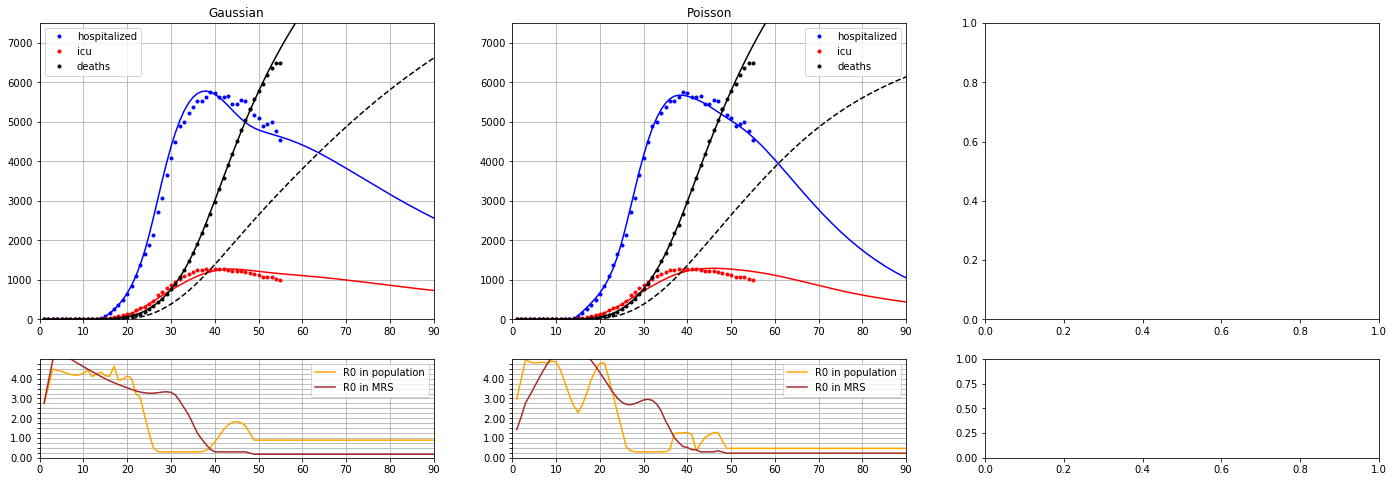

In [120]:
# Plots
fig, ax = plt.subplots(2, len(noise_error), figsize=(8*len(noise_error), 8), gridspec_kw={"height_ratios": (3,1)})
print(ax.shape)
for i, noise_model in enumerate(noise_error.keys()):
    if noise_model == "Neg_Binom":
        continue
    r0, r0_mrs, i0, gg, sigmas = fit_seir_parameters(data, noise=noise_model, use_sigma=True)
    #r0 = smoothen(r0)
    #r0_mrs = smoothen(r0_mrs)

    n_futures = 365
    r0 = np.concatenate((r0, np.array([r0[-1]] * (window + n_futures))))
    r0_mrs = np.concatenate((r0_mrs, np.array([r0_mrs[-1]] * (window + n_futures))))
    s, e, _, h, l, m, r = SEIR(r0, i0=i0, gg=gg)
    _, _, _, m_mrs, _ = SEIR_MRS(r0_mrs)

    n_days = len(data)

    ax[0, i].set_title(noise_model)
    ax[0, i].plot(range(1, n_days+1 + n_futures), h[1:]+l[1:], c="b")
    ax[0, i].plot(range(1, n_days+1), data["n_hospitalized"].values, ".", c="b", label="hospitalized")
    ax[0, i].plot(range(1, n_days+1 + n_futures), l[1:], c="r")
    ax[0, i].plot(range(1, n_days+1), data["n_icu"].values, ".", c="r", label="icu")
    ax[0, i].plot(range(1, n_days+1 + n_futures), m[1:] + m_mrs[1:], c="k")
    ax[0, i].plot(range(1, n_days+1 + n_futures), m[1:], "--", c="k")
    ax[0, i].plot(range(1, n_days+1), data["n_deaths"].values, ".", c="k", label="deaths")
    ax[0, i].grid()
    ax[0, i].set_ylim(0, 7500)
    ax[0, i].set_xlim(0, 90)
    ax[0, i].legend()

    ax[1, i].plot(range(1, n_days+1 + n_futures), r0, c="orange", label="R0 in population")
    ax[1, i].plot(range(1, n_days+1 + n_futures), r0_mrs, c="brown", label="R0 in MRS")
    ax[1, i].grid(which="both")
    ax[1, i].set_ylim(0, 5)
    ax[1, i].set_yticks(np.arange(0, 5, step=0.25))

    for j, l in enumerate(ax[1, i].get_yticklabels()):
        if j % 4 != 0:
            l.set_visible(False)
    ax[1, i].set_xlim(0, 90)
    ax[1, i].legend()

plt.show()

In [24]:
def seir_sim(theta, noise="Gaussian", n_futures=-1):
    r0, r0_mrs, i0, gg, sigmas = theta
    sigma_h, sigma_icu, sigma_death, sigma_death_mrs = sigmas
    r0 = np.concatenate((r0, np.array([r0[-1]] * (window + n_futures))))
    r0_mrs = np.concatenate((r0_mrs, np.array([r0_mrs[-1]] * (window + n_futures))))
    s, e, i, h, l, m, r = SEIR(r0, i0=i0, gg=gg)
    _, _, _, m_mrs, _ = SEIR_MRS(r0_mrs)
    noise_f = noise_sampler[noise]
    data = pd.DataFrame({
        "n_hospitalized": noise_f(h + l, sigma=sigma_h),
        "n_icu": noise_f(l, sigma=sigma_icu),
        "n_deaths": noise_f(m + m_mrs, sigma=sigma_death)
    }, index=range(1, 55+2 + n_futures))
    # add poisson
    return data

In [34]:
from tqdm import tqdm

In [35]:
def param_bootstrap(data, noise='Gaussian', nb_iter=1000):
    theta_hat = fit_seir_parameters(data, noise=noise, use_sigma=True)
    thetas_bootstrap = []
    all_data = []
    for i in tqdm(range(nb_iter)):
        sim_data = seir_sim(theta_hat, noise)
        all_data.append(sim_data)
        thetas_bootstrap.append(fit_seir_parameters(sim_data, noise=noise, use_sigma=True))
    return thetas_bootstrap, all_data

In [68]:
def plot(thetas_bootstrap, noise):
    n_futures = 30
    alpha=0.2
    fig, ax = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={"height_ratios": (3,1)})
    data_mean = 0.
    data_mean_2 = 0.
    r0_mean, r0_mrs_mean = 0., 0.
    r0_mean2, r0_mrs_mean2 = 0., 0.
    for i, theta in enumerate(thetas_bootstrap):
        r0, r0_mrs, i0, gg, sigmas = theta
        data_sim = seir_sim(theta, noise=noise, n_futures=n_futures)
        data_mean += data_sim
        data_mean_2 += data_sim**2
        r0_mean += r0
        r0_mean2 += r0**2
        r0_mrs_mean += r0_mrs
        r0_mrs_mean2 = r0_mrs**2

    data_mean /= i + 1
    data_mean_2 /= i + 1
    data_std = (data_mean_2 - data_mean**2)**.5

    r0_mean /= i + 1
    r0_mean2 /= i + 1
    r0_std = (r0_mean2 - r0_mean**2)**.5

    r0_mrs_mean /= i + 1
    r0_mrs_mean2 /= i + 1
    r0_mrs_std = (r0_mrs_mean2 - r0_mrs_mean**2)**.5

    n_days = len(data_sim)

    r0, r0_mrs, i0, gg, sigmas = theta
    r0 = smoothen(r0)
    r0_mrs = smoothen(r0_mrs)
    r0 = np.concatenate((r0, np.array([r0[-1]] * (window + n_futures))))
    r0_mrs = np.concatenate((r0_mrs, np.array([r0_mrs[-1]] * (window + n_futures))))

    ax[0].errorbar(range(1, n_days+1), data_mean["n_hospitalized"].values, yerr=data_std["n_hospitalized"].values,
                   c="b", label="hospitalized")
    ax[0].errorbar(range(1, n_days+1), data_mean["n_icu"].values, yerr=data_std["n_icu"].values,
               c="r", label="icu")
    ax[0].errorbar(range(1, n_days+1), data_mean["n_deaths"].values, yerr=data_std["n_deaths"].values, 
                   c="k", label="deaths")
    ax[0].grid()
    ax[0].set_ylim(0, 10000)
    ax[0].set_xlim(0, 80)

    ax[1].errorbar(range(1, n_days - window - n_futures), r0_mean, yerr=r0_std, c="orange", label="R0 in population")
    ax[1].errorbar(range(1, n_days - window - n_futures), r0_mrs_mean, yerr=r0_mrs_std, c="brown", label="R0 in MRS")
    ax[1].grid()
    ax[1].set_xlim(0, 80)
    if i == 0:
        ax[0].legend()
        ax[1].legend()

    plt.savefig("nicolas-reimpl-bootstrap.png")
    plt.show()

In [67]:
thetas_bootstrap_gauss, all_data_gauss = param_bootstrap(data, 'Gaussian', nb_iter=2)
plot(thetas_bootstrap_gauss, 'Gaussian')

100%|██████████| 2/2 [00:20<00:00, 10.37s/it]


TypeError: plot() takes 1 positional argument but 2 were given

Le plot gaussien foire car on fit une seule variance et donc ça donne n'importe quoi. Ca va aussi dans le sens de dire qu'utiliser la MSE est pas très logique car ça suppose une variance fixe.

/anaconda3/envs/UMNN/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt


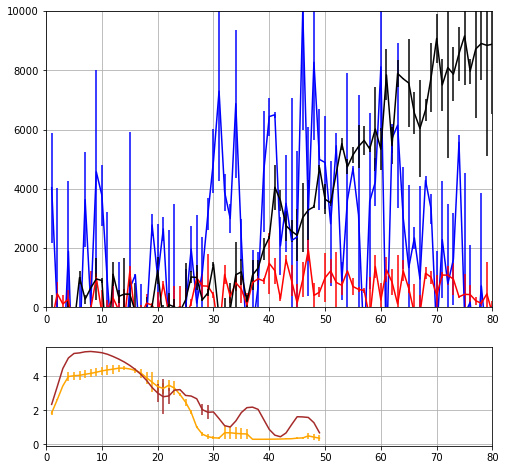

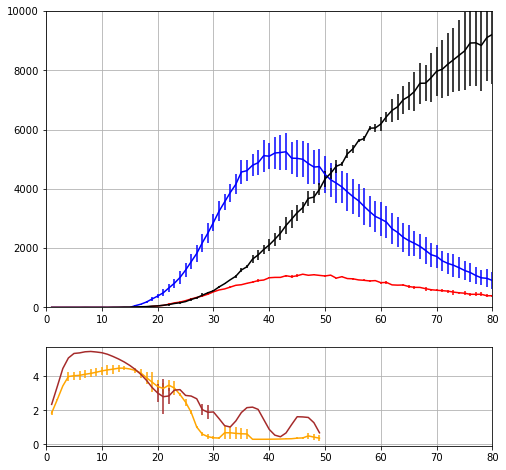

In [70]:
plot(thetas_bootstrap_gauss, 'Gaussian')
plot(thetas_bootstrap_gauss, 'Poisson')

100%|██████████| 2/2 [00:21<00:00, 10.54s/it]
/anaconda3/envs/UMNN/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt


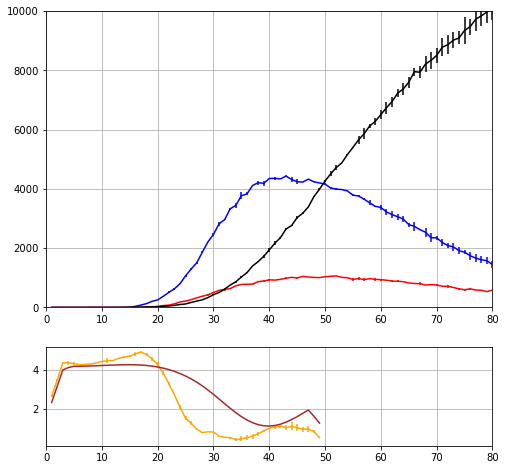

In [66]:
thetas_bootstrap_gauss, all_data_gauss = param_bootstrap(data, 'Poisson', nb_iter=2)
plot(thetas_bootstrap_gauss, 'Poisson')